In [5]:
import pandas as pd
import os
import sys
import numpy as np
import ast
import geopandas as gpd
import re
import math
import copy

from urllib.request import urlopen
from zipfile import ZipFile

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import MonthLocator, DateFormatter

import requests
from io import StringIO
from shapely.geometry import Point

from matplotlib_scalebar.scalebar import ScaleBar


import matplotlib as mpl
import glob

import glob
import seaborn as sb
sb.set(style='whitegrid', palette='pastel', color_codes=True)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE + 4)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE + 4)  # fontsize of the figure title


pd.set_option('display.max_columns', 0)  # show all columns
pd.options.display.max_colwidth = 100

In [3]:

# save_dir = r'T:\Shared drives\T5\safegraph_bias\figures'
# data_dir = r'T:\Shared drives\T5\safegraph_bias'

# save_dir = r'P:\Shared drives\T5\safegraph_bias\figures'
# data_dir = r'P:\Shared drives\T5\safegraph_bias'

data_dir = r'F:\Research\Safegraph_bias\20230916'
save_dir = r'F:\Research\Safegraph_bias\figures_20230917'



urban_rural_county_xls = os.path.join(data_dir, 'ruralurbancodes2013.xls')
urban_rural_county_df = pd.read_excel(urban_rural_county_xls, dtype={'FIPS':str})
# add the urban column
urban_rural_county_df['Urban'] = urban_rural_county_df['Description'].str[:5].replace({'Metro': 'Yes', 'Nonme': 'No'})


urban_rural_tract_csv = os.path.join(data_dir, 'FoodAccessResearchAtlasData2019.csv')
urban_rural_tract_df = pd.read_csv(urban_rural_tract_csv, dtype={'fips':str}, encoding='UTF-8')
# clean data
urban_rural_tract_df['FIPS'] = urban_rural_tract_df['fips'].astype(str).str.zfill(11)
urban_rural_tract_df['Urban'] = urban_rural_tract_df['Urban'].replace({1:'Yes', 0:'No'})

urban_rural_cbg_csv = os.path.join(data_dir, 'CBG_urbanization_2type_2019.csv')
urban_rural_cbg_df = pd.read_csv(urban_rural_cbg_csv, dtype={'CBG_FIPS':str})
urban_rural_cbg_df['FIPS'] = urban_rural_cbg_df['CBG_FIPS'] 

# store in a dict
urban_df_dict = {'county':urban_rural_county_df, 'tract':urban_rural_tract_df, 'CBG':urban_rural_cbg_df}
 
 
 

years = [2019, 2018, 2020, 2021, 2022]
levels = ['state', 'county']
data_dict = {}
# df_list = []
# for year in years:
#     # csv_file = os.path.join(data_dir, f'sampling_rates_{year}_monthly.csv')
#     csv_file = os.path.join(data_dir, f'/monthly_bias_{level}_{year}.csv')
#     try:
#         df = pd.read_csv(csv_file, dtype={'fips':str})
#     except:
#         df = pd.read_csv(csv_file, dtype={'fips':str}, encoding='utf-16')
#     df['start_date'] = pd.to_datetime(df['start_date'], format='%Y%m')
#     df['county_FIPS'] = df['fips'].str[:5]
#     df_list.append(df)
    
#     df = pd.concat(df_list).fillna("0")
#     # df['county_FIPS'] = df['county_fips'].astype(int).astype(str).str[:5]
#     df['bias_value'] = df['safegraph_ratio_mean_to_census'].astype(float) - 1
#     data_dict[year] = df
    
# data_dict[2019].sample(5)

for year in years:
    df_list = []
    for level in levels:
        csv_file = os.path.join(data_dir, f'monthly_bias_{level}_{year}.csv')
        print("Loading:", csv_file)
        df = pd.read_csv(csv_file, dtype={'state_fips':str, 'county_fips':str})
        df['fips_level'] = level # pd.to_datetime(df['start_date'], format='%Y%m')
        # df['county_FIPS'] = df['fips'].astype(str).str[:5]
        df_list.append(df)
    
    df = pd.concat(df_list).fillna("0")
    df['county_FIPS'] = df['county_fips'].astype(int).astype(str).str[:5]
    df['bias_value'] = df['safegraph_ratio_mean_to_census'].astype(float) - 1
    data_dict[year] = df

data_dict[2019]

Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_state_2019.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_county_2019.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_state_2018.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_county_2018.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_state_2020.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_county_2020.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_state_2021.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_county_2021.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_state_2022.csv
Loading: F:\Research\Safegraph_bias\20230916\monthly_bias_county_2022.csv


,state_fips,variable,start_date,end_date,period_count,CBG_count,safegraph_ratio_mean,safegraph_ratio_median,safegraph_ratio_min,safegraph_ratio_max,census_ratio,device_count,population,safegraph_ratio_mean_to_census,safegraph_ratio_median_to_census,safegraph_ratio_min_to_census,safegraph_ratio_max_to_census,bias,bias_median,bias_min,bias_max,fips_level,county_fips,county_FIPS,bias_value
0,01,Female,201901,201912,12,3431,0.516979,0.517002,0.515758,0.518181,0.516106,251066.821077,2.516173e+06,1.001691,1.001736,0.999326,1.004020,0.001691,0.001736,-0.000674,0.004020,state,0,0,0.001691
1,01,Male,201901,201912,12,3431,0.483021,0.482998,0.481819,0.484242,0.483894,234587.512257,2.359126e+06,0.998197,0.998148,0.995713,1.000719,-0.001803,-0.001852,-0.004287,0.000719,state,0,0,-0.001803
2,01,<15,201901,201912,12,3431,0.182360,0.182186,0.180906,0.184199,0.185570,88568.147741,9.047070e+05,0.982702,0.981768,0.974869,0.992615,-0.017298,-0.018232,-0.025131,-0.007385,state,0,0,-0.017298
3,01,15–17,201901,201912,12,3431,0.038884,0.038873,0.038656,0.039181,0.039311,18882.286798,1.916530e+05,0.989126,0.988848,0.983337,0.996700,-0.010874,-0.011152,-0.016663,-0.003300,state,0,0,-0.010874
4,01,18–24,201901,201912,12,3431,0.094991,0.096139,0.087396,0.100805,0.093958,46109.755820,4.580710e+05,1.011003,1.023219,0.930163,1.072882,0.011003,0.023219,-0.069837,0.072882,state,0,0,0.011003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76895,0,<20K,201901,201912,12,27,0.573943,0.576215,0.562279,0.580923,0.595335,444.637161,2.102995e+04,0.964067,0.967883,0.944474,0.975791,-0.035933,-0.032117,-0.055526,-0.024209,county,72153,72153,-0.035933
76896,0,20K–30K,201901,201912,12,27,0.156603,0.156539,0.153606,0.158737,0.148092,121.022029,5.230847e+03,1.057469,1.057042,1.037234,1.071883,0.057469,0.057042,0.037234,0.071883,county,72153,72153,0.057469
76897,0,30K–50K,201901,201912,12,27,0.159318,0.159363,0.156455,0.163204,0.151672,123.043296,5.357368e+03,1.050411,1.050709,1.031535,1.076033,0.050411,0.050709,0.031535,0.076033,county,72153,72153,0.050411
76898,0,50K–100K,201901,201912,12,27,0.095372,0.094835,0.090153,0.102938,0.090608,72.809478,3.200348e+03,1.052579,1.046655,0.994981,1.136074,0.052579,0.046655,-0.005019,0.136074,county,72153,72153,0.052579


In [9]:
!pip install seaborn --upgrade
!pip install pandas --upgrade

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.6 kB 812.7 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ce/cd/a7c2cbffe2afff975349e60b14b63a448162145a7acac8ba12ddc2ed78a8/pandas-2.1.1-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.7

2019 len of df: 74876
Level: state len of level_df: 1186
level_df  min max: -0.14047730998344832 0.13603750630318978
2018 len of df: 74840
Level: state len of level_df: 1172
level_df  min max: -0.13364674141397448 0.13542896817921224
2020 len of df: 74876
Level: state len of level_df: 1182
level_df  min max: -0.14224876815488796 0.137003128941535
2021 len of df: 74876
Level: state len of level_df: 1184
level_df  min max: -0.14293967229164262 0.1389381259747704
2022 len of df: 74876
Level: state len of level_df: 1177
level_df  min max: -0.1421406619805533 0.1354879747654938


,state_fips,variable,start_date,end_date,period_count,CBG_count,safegraph_ratio_mean,safegraph_ratio_median,safegraph_ratio_min,safegraph_ratio_max,census_ratio,device_count,population,safegraph_ratio_mean_to_census,safegraph_ratio_median_to_census,safegraph_ratio_min_to_census,safegraph_ratio_max_to_census,bias,bias_median,bias_min,bias_max,fips_level,county_fips,county_FIPS,bias_value,FIPS,State,County_Name,Population_2010,RUCC_2013,Description,Urban
0,01,Female,202201,202212,12,3431,0.517390,0.517029,0.515805,0.519700,0.516106,3.031418e+05,2.516173e+06,1.002486,1.001788,0.999416,1.006963,0.002486,0.001788,-0.000584,0.006963,state,0,0,0.002486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,02,Female,202201,202212,12,529,0.478580,0.477793,0.475689,0.482220,0.478907,2.158890e+04,3.513006e+05,0.999318,0.997675,0.993281,1.006919,-0.000682,-0.002325,-0.006719,0.006919,state,0,0,-0.000682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,04,Female,202201,202212,12,4150,0.504848,0.504954,0.503981,0.505443,0.504335,3.032254e+05,3.539080e+06,1.001015,1.001227,0.999298,1.002195,0.001015,0.001227,-0.000702,0.002195,state,0,0,0.001015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,05,Female,202201,202212,12,2142,0.510934,0.510892,0.510175,0.511839,0.509464,1.783181e+05,1.526125e+06,1.002885,1.002803,1.001395,1.004662,0.002885,0.002803,0.001395,0.004662,state,0,0,0.002885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,06,Female,202201,202212,12,23089,0.504348,0.504623,0.503213,0.505237,0.504139,1.208024e+06,1.974149e+07,1.000415,1.000961,0.998162,1.002178,0.000415,0.000961,-0.001838,0.002178,state,0,0,0.000415,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61106,0,>100K,202201,202212,12,21,0.012579,0.012916,0.010873,0.013774,0.013196,4.305549e+00,3.692283e+02,0.953211,0.978782,0.824001,1.043772,-0.046789,-0.021218,-0.175999,0.043772,county,72123,72123,-0.046789,72123,PR,Salinas Municipio,31078.0,4.0,"Nonmetro - Urban population of 20,000 or more, adjacent to a metro area ...",Rural
61128,0,>100K,202201,202212,12,22,0.030715,0.031477,0.026587,0.033236,0.028865,1.634174e+01,9.007479e+02,1.064073,1.090462,0.921064,1.151420,0.064073,0.090462,-0.078936,0.151420,county,72125,72125,0.064073,72125,PR,San German Municipio,35527.0,3.0,"Metro - Counties in metro areas of fewer than 250,000 population ...",Urban
61193,0,>100K,202201,202212,12,24,0.020524,0.020621,0.018325,0.023726,0.018644,8.962517e+00,6.892941e+02,1.100841,1.106020,0.982873,1.272553,0.100841,0.106020,-0.017127,0.272553,county,72131,72131,0.100841,72131,PR,San Sebastian Municipio,42430.0,2.0,"Metro - Counties in metro areas of 250,000 to 1 million population ...",Urban
61291,0,>100K,202201,202212,12,22,0.011050,0.011889,0.006463,0.013457,0.011901,2.664051e+00,3.373311e+02,0.928465,0.999002,0.543012,1.130706,-0.071535,-0.000998,-0.456988,0.130706,county,72141,72141,-0.071535,72141,PR,Utuado Municipio,33149.0,2.0,"Metro - Counties in metro areas of 250,000 to 1 million population ...",Urban


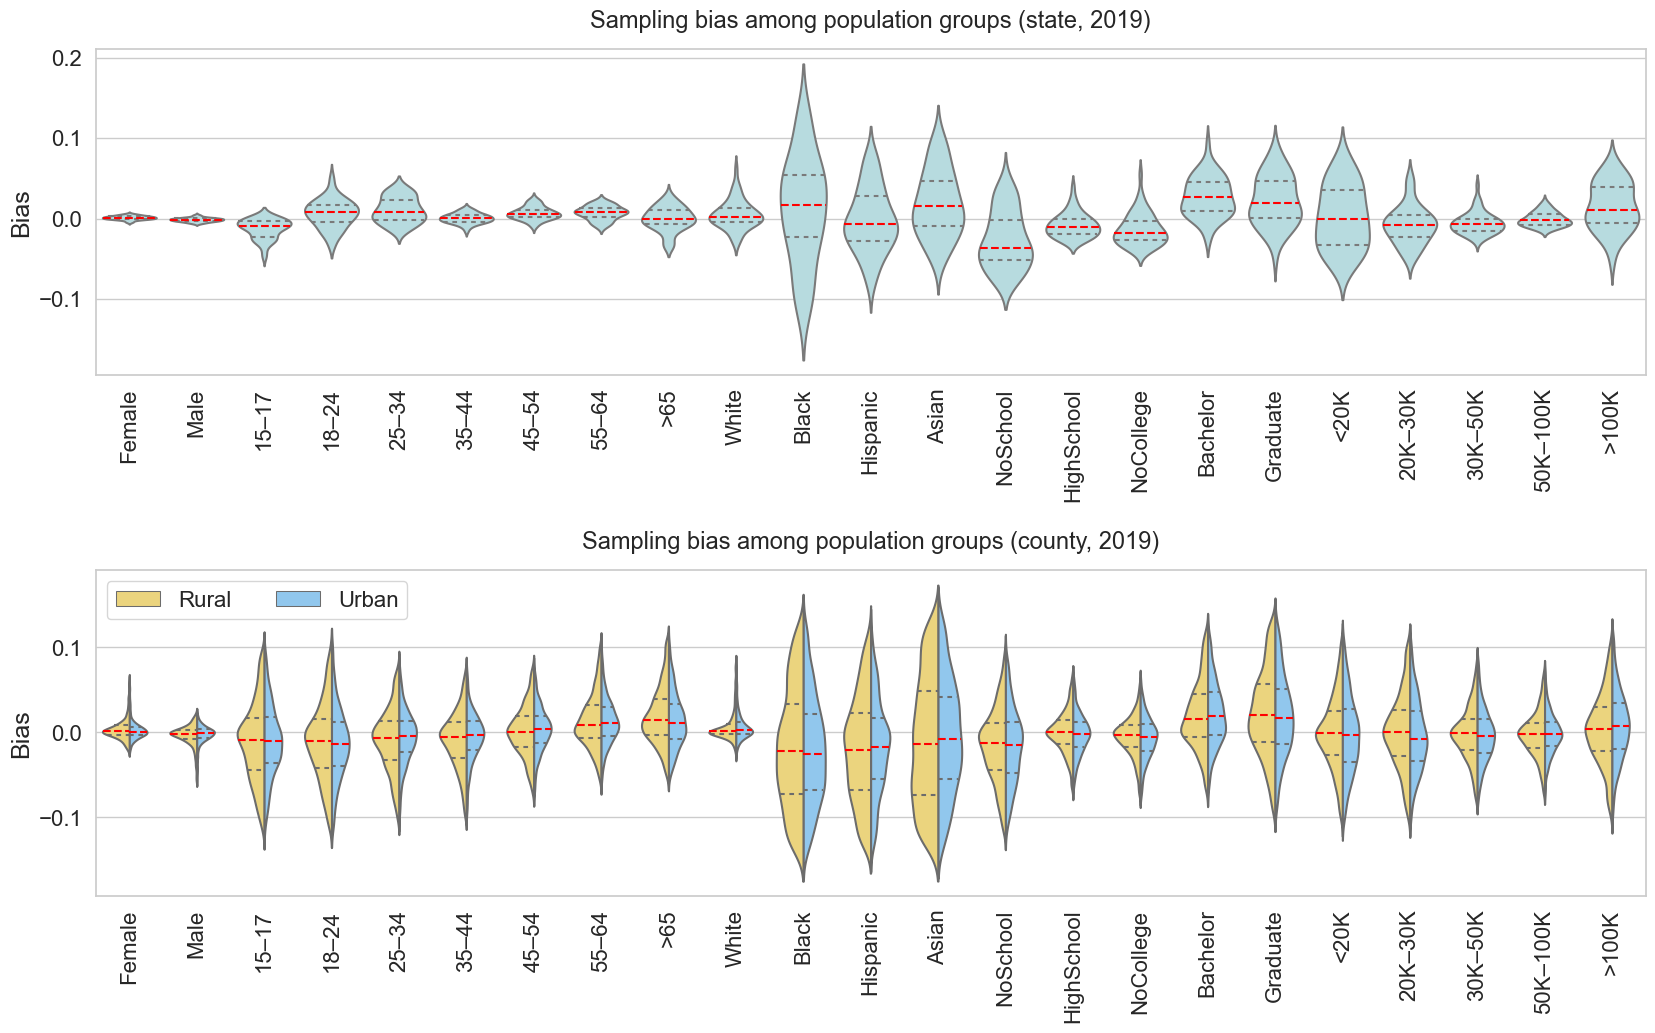

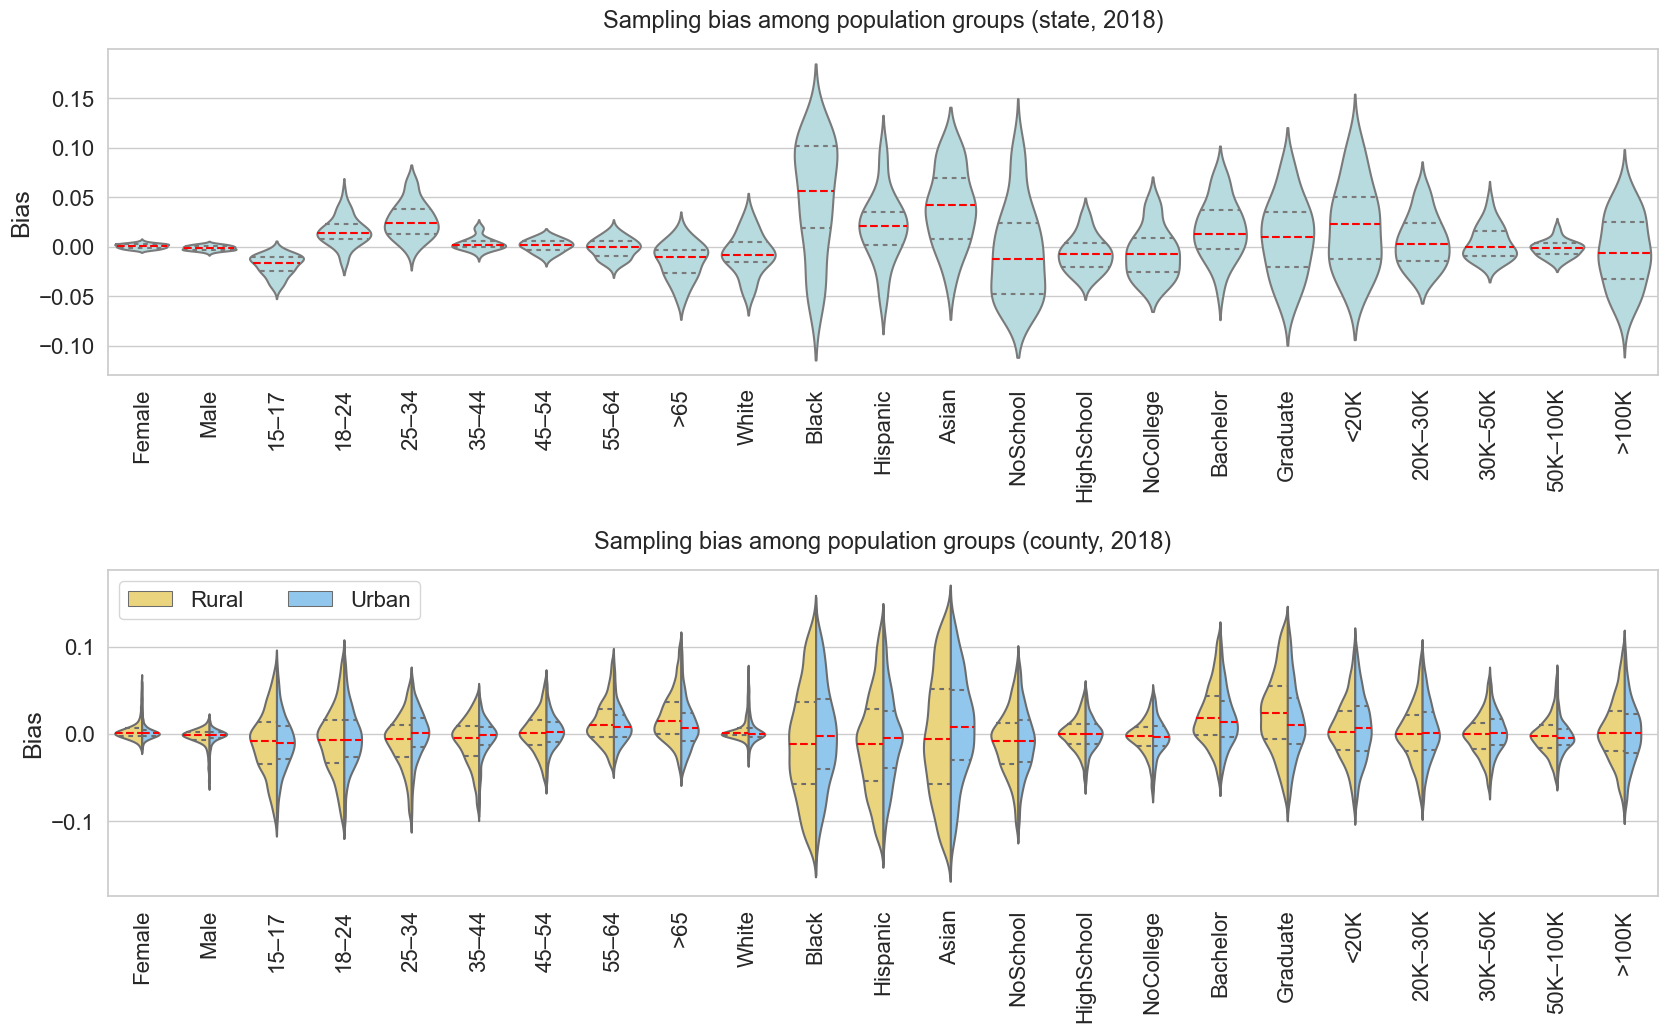

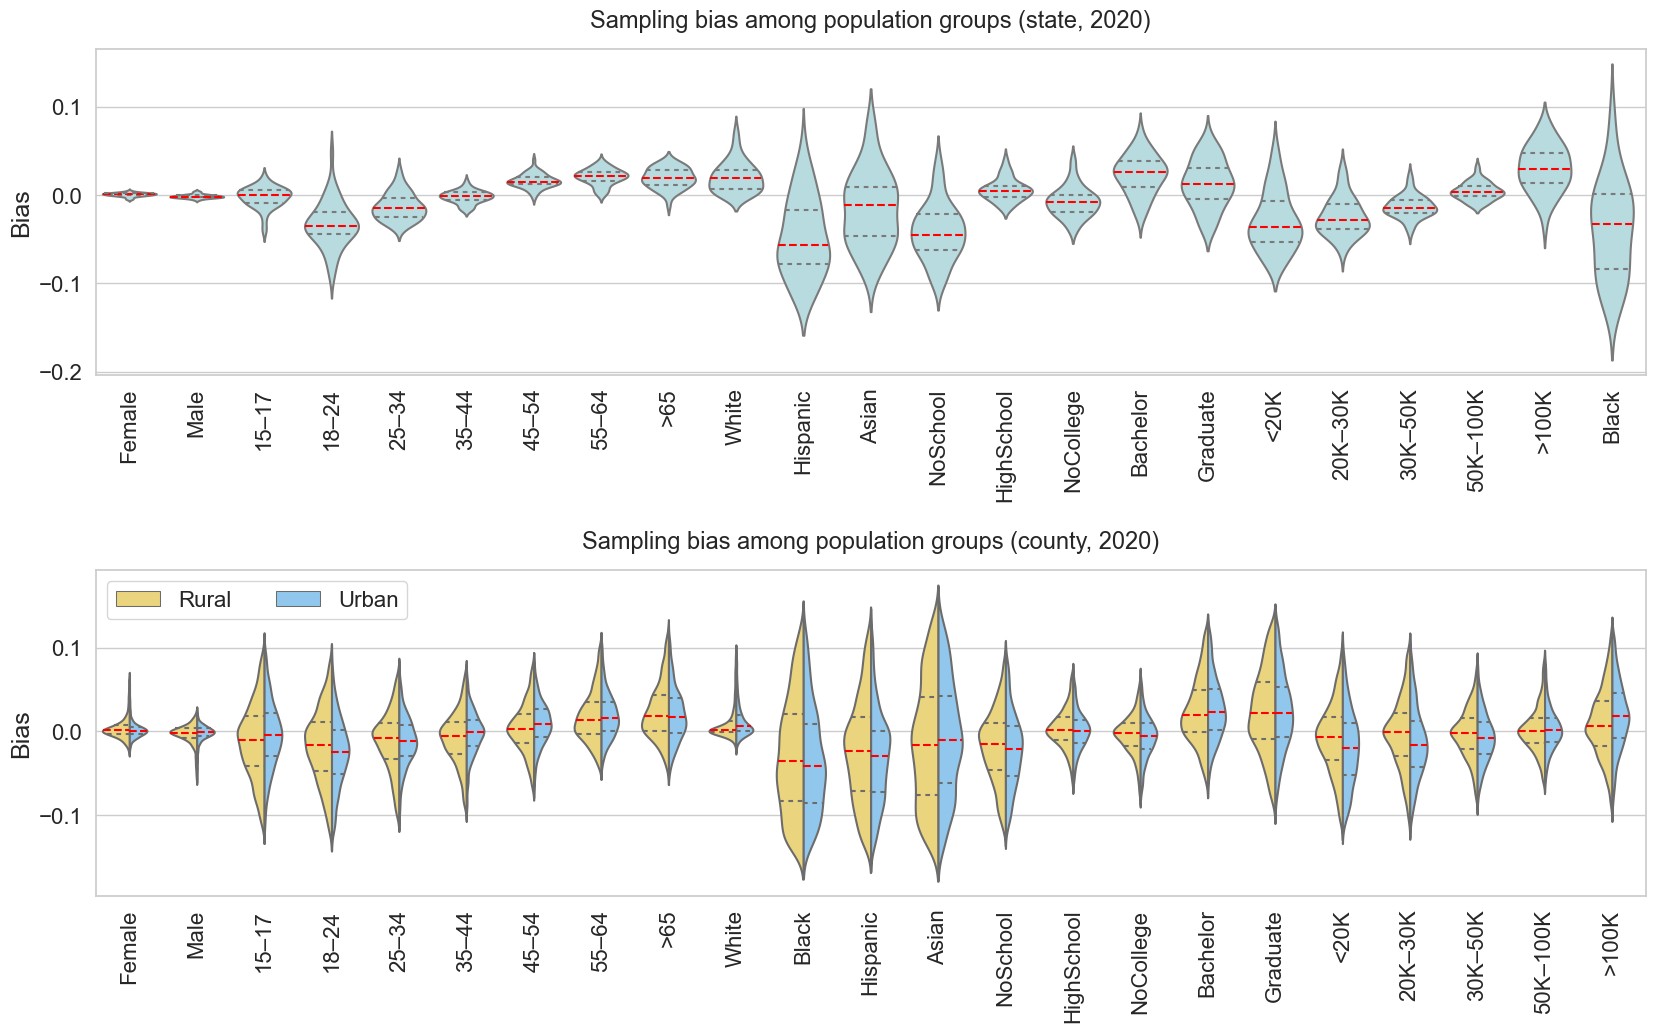

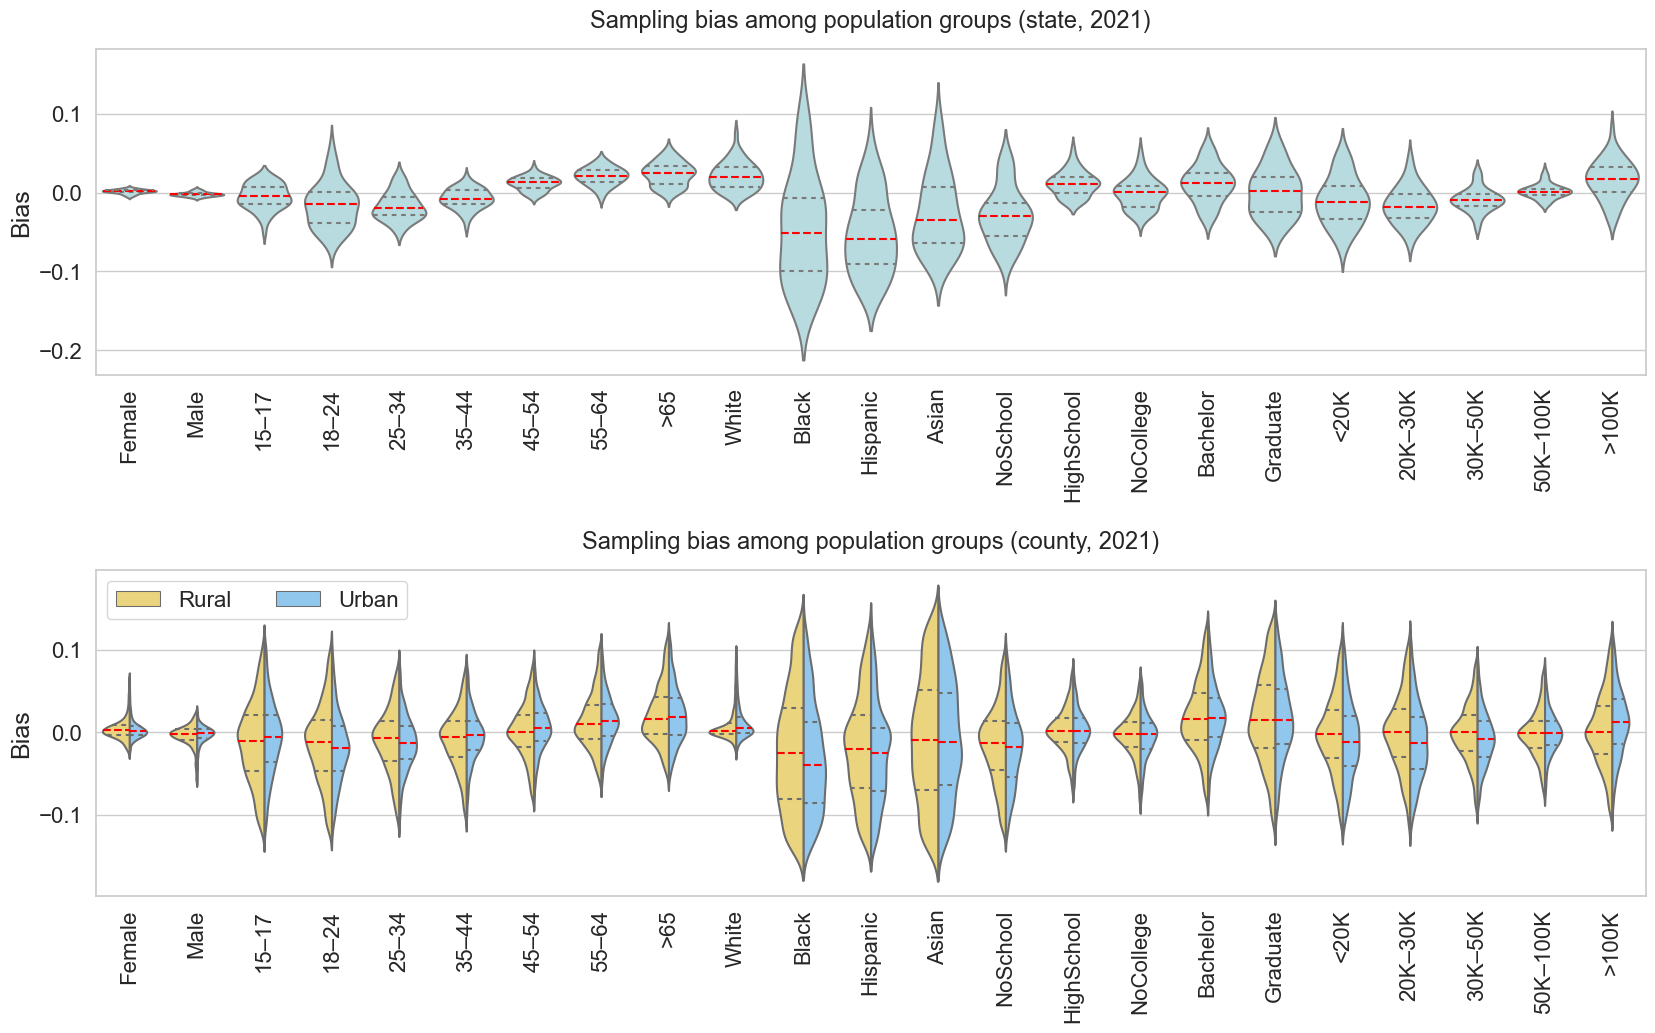

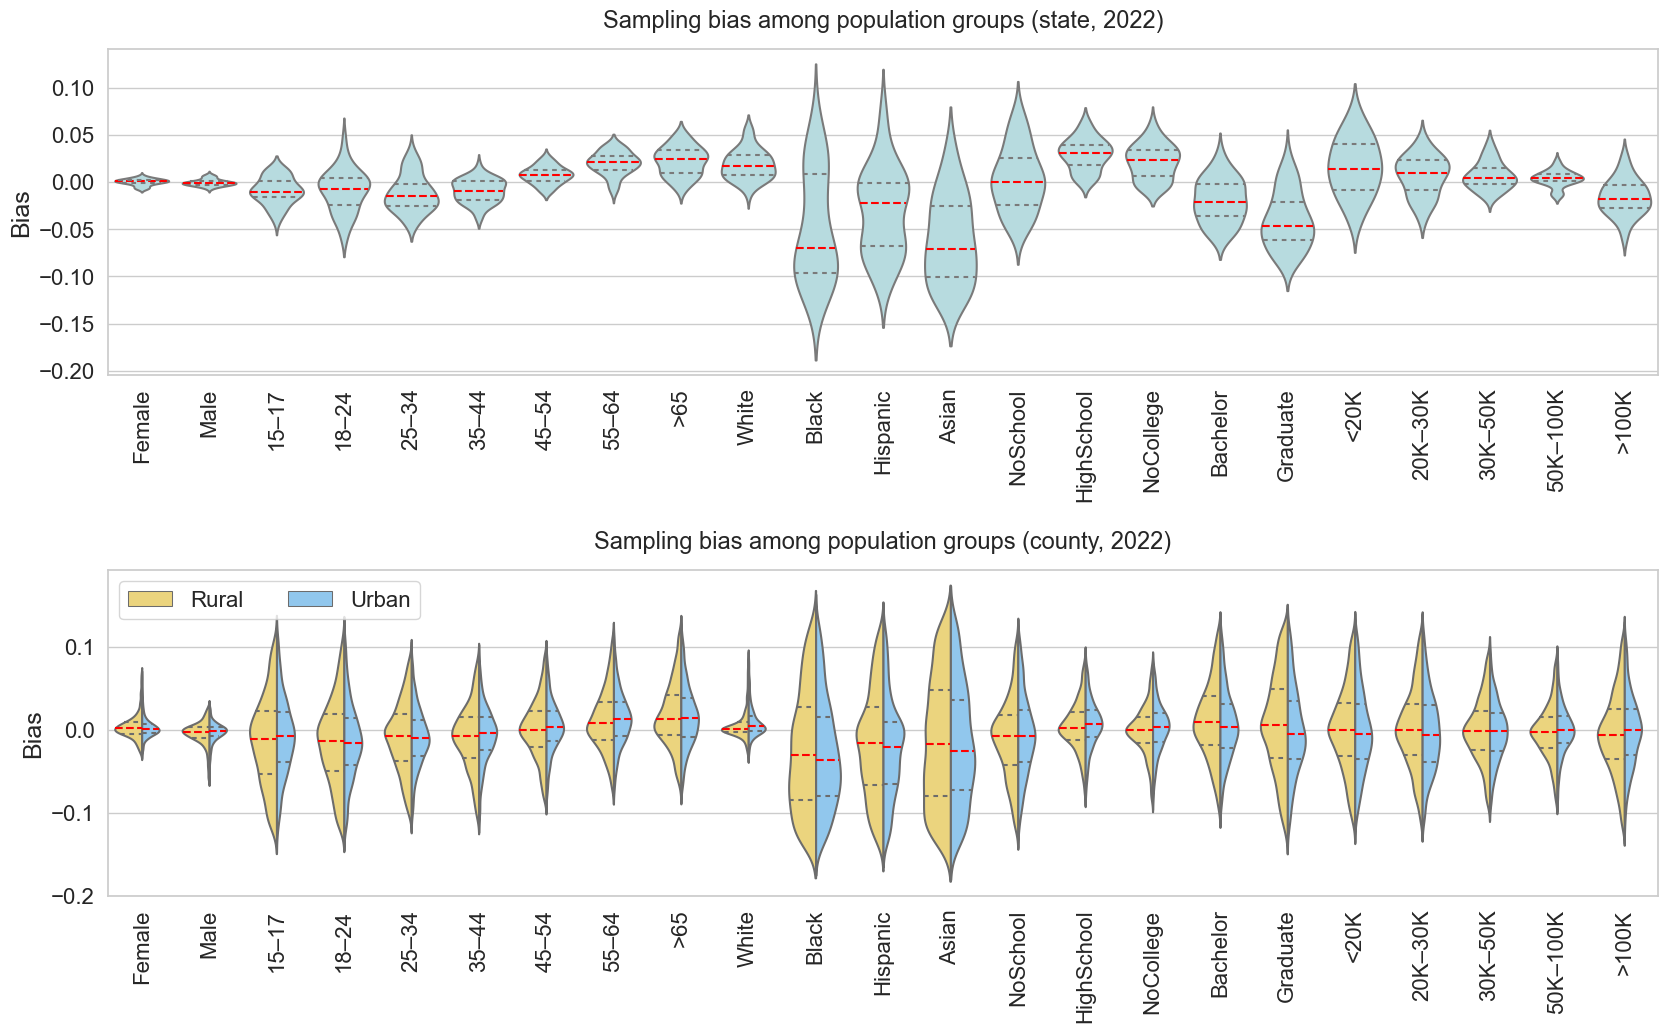

In [12]:
import warnings

# Filter out warnings with category 'FutureWarning'
warnings.simplefilter(action='ignore', category=FutureWarning)


def bias_monthly_yearly_violin(df, year):
    
    
    aggre_df_list = []
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 11), facecolor='white')
    plt.subplots_adjust(wspace=0.3, hspace=0.6) #wspace for the space between left and right, size means the fraction of the average of axes
    
    # fig.suptitle(f'Sampling bias among population groups ({level} level, {year})', fontsize=16, y=0.92)
    
    # plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    # plt.rc('axes', titlesize=BIGGER_SIZE + 4)     # fontsize of the axes title
    # plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
    plt.rc('legend', fontsize=16)    # legend fontsize
    # plt.rc('figure', titlesize=BIGGER_SIZE + 4)  # fontsize of the figure title

    for level in df['fips_level'].unique(): 

        level_df = df.query(f"fips_level == '{level}' ")        
        level_df = level_df.query(" bias_value < 0.15 and bias_value > -0.15")     

        variable_cnt = level_df['variable'].nunique()
        mid_point = int(variable_cnt / 2)           

        if level == 'state': 
            print("Level:", level, "len of level_df:", len(level_df))

            # clean data
            v_df_list = []
            for v in level_df['variable'].unique():
                v_df = level_df.query(f" variable == '{v}' ")
                v_df = v_df.query(" bias_value <  bias_value.quantile(.975)")
                v_df = v_df.query(" bias_value >  bias_value.quantile(.025)")
                v_df = v_df.query(" bias_value < 0.4 and bias_value > -0.4")
                v_df_list.append(v_df)
            level_df = pd.concat(v_df_list)
            
            # top row
            ax = axs[0]
            row_variables = list(level_df['variable'].unique())[:]# .remove("<15")
            ax = sb.violinplot(y="bias_value", x="variable", #hue="Urban",
                           inner="quart", split=True, color='powderblue',
                        # split=True, inner="quart", color='white',
                        # palette={"Yes": "#2AEFF3", "No": "#F6D051"},   
                        medianprops=dict(color="red", alpha=0.7),
                        ax=ax,        
                        scale="count",              
                        data=level_df[level_df['variable'].isin(row_variables)])
            
            aggre_df_list.append(level_df)
            
            for idx, line in enumerate(ax.get_lines()):
                if idx % 3 == 1:
                    line.set_color("red")
            
                 
 
            
        if level == 'county':
            # fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,12), facecolor='white')

            ax = axs[1]

            level_df = level_df.merge(urban_df_dict['county'], left_on='county_FIPS', right_on='FIPS')
            level_df['Urban'] = level_df['Urban'].replace({'Yes':'Urban', 'No': 'Rural'})

            # clean data
            v_df_list = []
            for v in level_df['variable'].unique():
                v_df = level_df.query(f" variable == '{v}' ")
                v_df = v_df.query(" bias_value <  bias_value.quantile(.975)")
                v_df = v_df.query(" bias_value >  bias_value.quantile(.025)")                
                v_df_list.append(v_df)
            level_df = pd.concat(v_df_list)

            print("level_df  min max:", level_df['bias_value'].min(), level_df['bias_value'].max())

 
            # top row
            ax = axs[1]
            row_variables = list(level_df['variable'].unique())[:]
            ax = sb.violinplot(y="bias_value", x="variable", hue="Urban",
                   #color='powderblue',
                split=True, inner="quart", color='white',
                palette={"Urban": "#82cafc", "Rural": "#fdde6c"},  # powderblue  limegreen sunflower:#FFC512 azure:#069af3 
                ax=ax,        
                scale="count",              
                hue_order  = ['Rural', 'Urban'],               
                # medianprops=dict(color="red", alpha=1),
                data=level_df[level_df['variable'].isin(row_variables)])
            
            aggre_df_list.append(level_df)
            
            ax.legend(loc='upper left', ncol=2)
            
        for idx, line in enumerate(ax.get_lines()):
            if idx % 3 == 1:
                line.set_color("red")
                line.set_linestyle('dashed')
            
        ax.set_title(f'Sampling bias among population groups ({level}, {year})', y=1.04, fontsize=17)  
        ax.set_xlabel('')
        ax.set_ylabel('Bias')
        plt.setp(ax.get_xticklabels(), rotation=90)      
        new_name = os.path.join(save_dir, f"Bias_violin_{year}.png")
        plt.savefig(new_name, dpi=300, bbox_inches='tight', pad_inches=0.2)
        
        new_name = os.path.join(save_dir, f"Bias_violin_{year}.csv")
        aggre_df = pd.concat(aggre_df_list)
        aggre_df.to_csv(new_name, index=False)

    return aggre_df


aggre_dict = {}
for year, df in data_dict.items():
    df = df.query("variable != '<15' ")
    print(year, f'len of df:', len(df))
     
    aggre_df = bias_monthly_yearly_violin(df, year)
    
    aggre_dict[year] = aggre_df

    # break
# aggre_dict

aggre_df